<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Nearest%20Neighbor/AIML_CEP_NearestNeighbor_TA_session_06Nov2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Nearest Neighbor Classification Example

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
n = 300
X,y = make_moons(n_samples=n, shuffle=True, noise=0.15, random_state=24)
print ('print first five target values before changing 0 to -1')
print (y[0:5])
y = np.where(y>=1,y,-1)
print('moon data shape:', np.shape(X))

#check the shape of moon target labels
print('moon target shape:', np.shape(y))
#We can print first 5 samples of moon data and check 
print('Features of first five samples of moon data:')
print(X[0:5,])
print ('print first five target values after changing 0 to -1')
print (y[0:5])

print first five target values before changing 0 to -1
[1 0 0 1 0]
moon data shape: (300, 2)
moon target shape: (300,)
Features of first five samples of moon data:
[[ 0.36139365 -0.08991963]
 [ 0.56751482  0.9474018 ]
 [-0.89414746  0.61292345]
 [ 0.13689414 -0.27264645]
 [ 0.87141633  0.5627972 ]]
print first five target values after changing 0 to -1
[ 1 -1 -1  1 -1]


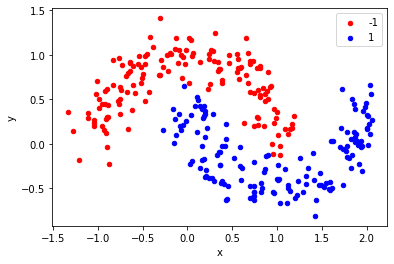

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# scatter plot, dots colored by class value

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
   group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
np.random.seed(1000)
#Create an index array 
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*n)
#Use the remaining 20% samples for testing 
num_test = n-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  240 num_test:  60


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(240, 2)
shape of train data labels
(240,)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:n]]
test_y = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(60, 2)
shape of test data labels
(60,)


*   $\ell_2$ distance (Euclidean) between $x$ and $z$ given by: $\|x-z\|_2 = \sqrt{\sum_{i=1}^{d} (x_i - z_i)^2}$
*   $\ell_1$ distance (Manhattan) between $x$ and $z$ given by: $\|x-z\|_1 = \sum_{i=1}^{d} |x_i - z_i|$
*   $\ell_\infty$ distance (Chebyshev) between $x$ and $z$ given by: $\|x-z\|_\infty = \max_{i \in \{1,2,\ldots,d\}} |x_i - z_i|$
*   $\ell_p$ distance (Minkowski) between $x$ and $z$ given by: $\|x-z\|_p =  (\sum_{i=1}^{d} |x_i - z_i|^p)^\frac{1}{p}$, where $1 \leq p < \infty$.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

K = [2, 5, 10, 15, 20, 25]
dist_metrics = ['euclidean', 'manhattan', 'chebyshev']
best_K = {}
avg_score = np.zeros(len(K))
for metric_ in dist_metrics:
  print(metric_,'metric')
  avg_score = np.zeros(len(K))
  for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k, metric=metric_) #weights='uniform' (default) or 'distance'
    scores = cross_val_score(neigh, train_X, train_y, cv=5)
    avg_score[K.index(k)] = np.mean(scores)
  print(avg_score)
  max_score_index = np.argmax(avg_score)
  # print(max_score_index)
  best_K[metric_] = K[max_score_index]

print ('best hyperparameters = ', best_K)

euclidean metric
[0.975      0.98333333 0.99166667 0.99166667 0.99166667 0.99166667]
manhattan metric
[0.975      0.98333333 0.9875     0.9875     0.99166667 0.99166667]
chebyshev metric
[0.97916667 0.98333333 0.9875     0.99166667 0.99166667 0.99166667]
best hyperparameters =  {'euclidean': 10, 'manhattan': 20, 'chebyshev': 15}


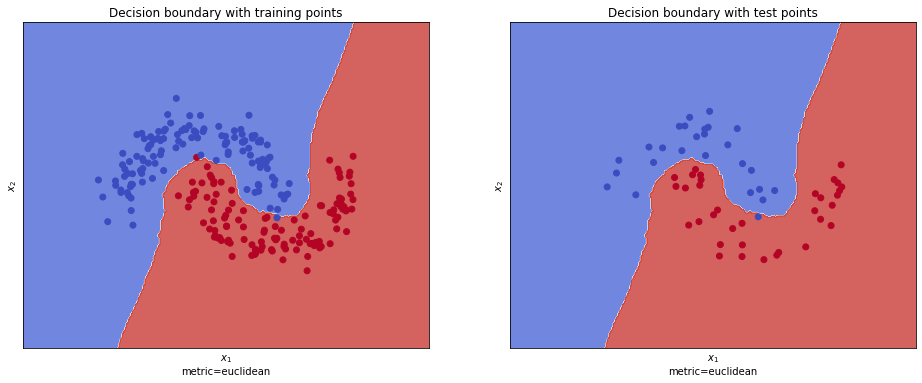

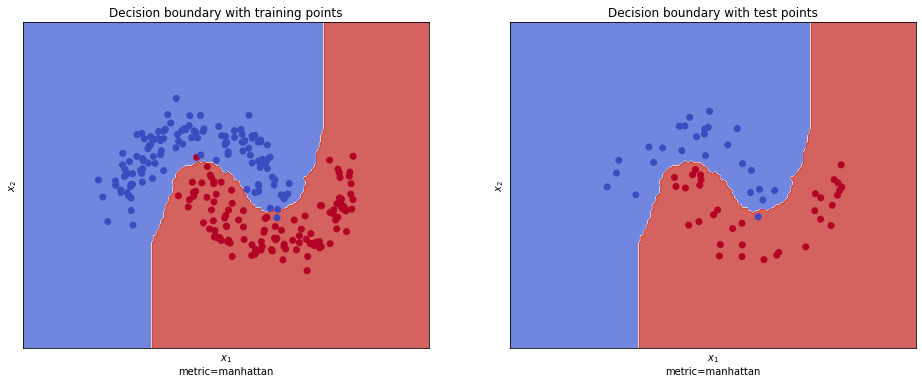

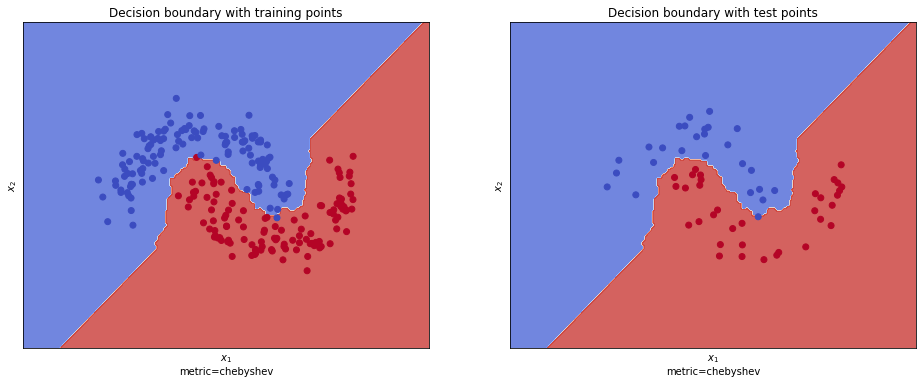

Train accuracy: {'euclidean': 99.16666666666667, 'manhattan': 98.75, 'chebyshev': 99.16666666666667}
Test accuracy: {'euclidean': 98.33333333333333, 'manhattan': 98.33333333333333, 'chebyshev': 98.33333333333333}


In [ ]:
# for creating a mesh to plot in
h=0.02 #mesh step size
num_samples = len(X)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

from sklearn.neighbors import KNeighborsClassifier
train_accuracy = {}
test_accuracy = {}
for metric_ in dist_metrics:
  neigh = KNeighborsClassifier(n_neighbors=best_K[metric_], metric=metric_)
  neigh_model = neigh.fit(train_X,train_y.ravel())
  predicted_labels = neigh_model.predict(train_X)
  # print(predicted_labels)
  train_error = np.sum(0.5*np.abs(predicted_labels-train_y.ravel()))/len(train_y)*100.0
  train_accuracy[metric_] = 100.0-train_error
  predicted_test_labels = neigh_model.predict(test_X)
  test_error = np.sum(0.5*np.abs(predicted_test_labels-test_y.ravel()))/len(test_y)*100.0
  test_accuracy[metric_] = 100.0-test_error
  ## visualizing decision boundary
  Z = neigh_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx1.shape)
  
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
  ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
  # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
  # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
  xlabel = '$x_1$' + str('\n')+'metric='+str(metric_)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel('$x_2$')
  ax1.set_xlim(xx1.min(), xx1.max())
  ax1.set_ylim(xx2.min(), xx2.max())
  ax1.set_xticks(())
  ax1.set_yticks(())
  ax1.set_title('Decision boundary with training points')

  #plot the test points along with decision boundaries
  ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
  xlabel = '$x_1$' + str('\n')+'metric='+str(metric_)
  ax2.set_xlabel(xlabel)
  ax2.set_ylabel('$x_2$')
  ax2.set_xlim(xx1.min(), xx1.max())
  ax2.set_ylim(xx2.min(), xx2.max())
  ax2.set_xticks(())
  ax2.set_yticks(())
  ax2.set_title('Decision boundary with test points')


  plt.show()

print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)